### Assignment 2 - Set-2: Normal Distribution Functions of random variables

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

In [68]:
company_name = pd.Series(['Allied Signal','Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.','Lehman Brothers','Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems','Travelers','US Airways','Warner-Lambert'])
company_name
measure = pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])
bs2_df = pd.DataFrame(company_name, columns =['company_name'], dtype = str)
bs2_df['measure'] = measure
bs2_df

,company_name,measure
0,Allied Signal,24.23
1,Bankers Trust,25.53
2,General Mills,25.41
3,ITT Industries,24.14
4,J.P.Morgan & Co.,29.62
5,Lehman Brothers,28.25
6,Marriott,25.81
7,MCI,24.39
8,Merrill Lynch,40.26
9,Microsoft,32.95


In [69]:
# Population Mean - MU
bs2_population_mean_mu = bs2_df['measure'].mean()
bs2_population_mean_mu # Output - 33.27133333333333

33.27133333333333

In [70]:
# Population Median
bs2_population_mean_median = bs2_df['measure'].median()
bs2_population_mean_median # Output - 33.27133333333333

26.71

In [71]:
# Population Mean - Standard Deviation - Sigma
bs2_population_mean_std = bs2_df['measure'].std()
bs2_population_mean_std # Output - 16.945400921222028

16.945400921222028

In [72]:
# Population Mean - Variance - Variance
bs2_population_mean_var = bs2_df['measure'].var()
bs2_population_mean_var # Output - 287.1466123809524

287.1466123809524

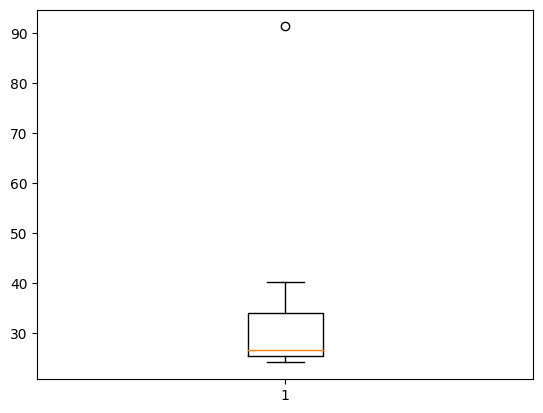

In [73]:
# Box Plot
import matplotlib.pyplot as plt
box_plot = plt.boxplot(bs2_df['measure'])

In [74]:
box_plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1a31104c910>,
 'caps': [<matplotlib.lines.Line2D at 0x1a31104ce50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a31104c670>],
 'medians': [<matplotlib.lines.Line2D at 0x1a31104d390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a31104d630>],
 'means': []}

Finding the Outlier Values

In [75]:
# The 'fliers' parameter has details about the outliers
[item.get_ydata() for item in box_plot['fliers']]

[array([91.36])]

In [76]:
for item in box_plot['fliers']:
    print(item.get_ydata()) # retrieving outliers for vertical boxplot
    #print(item.get_xdata()) # retrieving outliers for horizontal boxplot

[91.36]


In [77]:

# Alternate Method to find Outliers using Quartiles

# Finding the 1st quartile
q1 = np.quantile(bs2_df['measure'], 0.25)
 
# Finding the 3rd quartile
q3 = np.quantile(bs2_df['measure'], 0.75)

# Finding the median
# med = np.quantile(bs2_df['measure'], 0.50) # The 50% quartile is the median
# med = bs2_df['measure'].median() # Another way to get the median
med = np.median(bs2_df['measure'])

# Finding the Inter Quartile Range (IQR) region
iqr = q3-q1
 
# Finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = bs2_df['measure'][(bs2_df['measure'] <= lower_bound) | (bs2_df['measure'] >= upper_bound)]
print('The following are the outliers in the boxplot: '+str(outliers.max()))



The following are the outliers in the boxplot: 91.36


### Assignment 2 - Set-2: Normal Distribution Functions of random variables

#### Question 1. Probability that the service manager cannot meet his commitment
- MU - 45 minutes 
- Sigma - 8 minutes
- Delay from Start - 10 minutes
- Target Time of Completion - 1 Hour i.e., 60 minutes

In [78]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [79]:
# Expected within 60 minutes, MU - 45 + delayed by 10 = 55 minutes, Sigma = 8 mins
# The probability that we finish within 60 minutes is stats stats.norm.cdf(60,loc=55,scale=8)
# The probability that it does not finish within 60 minutes = 1 - stats.norm.cdf(60,loc=55,scale=8)
1-stats.norm.cdf(60,loc=55,scale=8) # 0.26598552904870054

# Alternatively - Let's suppose we need to complete in 50 mins as the work starts after 10 minutes and expectation is it should be completed in 1 hour i.e. 60 mins.
# In that case Mean or MU = 45 and Sigma or standard deviation is 8 mins.
1- stats.norm.cdf(50,loc=45,scale=8) # 0.26598552904870054

# Solution: Both approaches give the same answer 0.26598552904870054

0.26598552904870054

#### Question 2. True Or False Statements -
- MU    - 38
- Sigma - 6
- n     - 400

##### 2A. More employees at the processing center are older than 44 than between 38 and 44

In [80]:
# Probability lesser than 44
stats.norm.cdf(44,loc=38,scale=6)  # 0.8413447460685429

# Probability greater i.e. "Older than 44"
1-stats.norm.cdf(44,loc=38,scale=6)  # 0.15865525393145707

# Probability of lesser than 38
stats.norm.cdf(38,loc=38,scale=6) # 0.5

# Probability "Between 38 and 44"
stats.norm.cdf(44,loc=38,scale=6) - stats.norm.cdf(38,loc=38,scale=6) # 0.3413447460685429

# Solution: Statement is False as there are more employees "Between 38 and 44"

0.3413447460685429

##### 2B.	A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.

In [81]:
# Probability of lesser than 30
stats.norm.cdf(30,loc=38,scale=6) # 0.09121121972586788
0.09121121972586788 * 400 # 36.484487890347154


# Solution: Statement is True as the probability of lesser than 30 is 36 approx.

36.484487890347154

#### Question 4.	Let X ~ N(100, 20**2). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 
- MU - 100
- Sigma - 20
- Expected probability - 0.99

In [82]:
# Expected probability is 0.99
# MU - 100
# Sigma - 20
stats.norm.interval(0.99,loc=100,scale=20)  # (48.48341392902199, 151.516586070978)

# The range (48.48341392902199, 151.516586070978) matches to option "D.	48.5, 151.5"

(48.48341392902199, 151.516586070978)

In [83]:
# Reverse Checking by substituting the values obtained from earlier command
stats.norm.cdf(151.5,loc=100,scale=20) - stats.norm.cdf(48.5,loc=100,scale=20) # 0.9899759913364774

# This gives the expected probability of 0.99

0.9899759913364774

Alternative Method

In [84]:
# Getting the point a based on the percentage 0.005
stats.norm.ppf(0.005,loc=100,scale=20) # 48.483413929021985

# Getting the point b based on the percentage 0.995
stats.norm.ppf(0.995,loc=100,scale=20) # 151.516586070978

151.516586070978

#### Question 5 
- A company that has two different divisions. 
- Profit1 ~ N(5, 32) and Profit2 ~ N(7, 42)
- $1 = Rs. 45

In [85]:
import numpy as np
from scipy import stats
from scipy.stats import norm

In [86]:
# Mean profits from two different divisions of a company = Mean1 + Mean2
# Profit1 ~ N(5, 3**2) and Profit2 ~ N(7, 4**2)
#  Divisions        Mean      Variance
#  Division1          5         3**2
#  Division2          7         4**2

Mean_Profit_Sum_D = 5 + 7                       # Mean Profit in Million Dollars
Mean_Profit_Sum_R = Mean_Profit_Sum_D * 45      # Mean Profit in Million Rupees; Coversion Rate provided is $1 = Rs.45
print('The Sum of the Mean Profit is Rs.', Mean_Profit_Sum_R, 'million')


The Sum of the Mean Profit is Rs. 540 million


In [87]:
# Variance of profits from two different divisions of a company = Variance1 + Variance2
# Profit1 ~ N(5, 3**2) and Profit2 ~ N(7, 4**2)
#  Divisions        Variance
#  Division1         3**2
#  Division2         4**2

Variance_Profit_Sum_D = (3**2) + (4**2)             # Variance of Profit in Million Dollars
SD_Profit_D = np.sqrt(Variance_Profit_Sum_D)        # Standard Deviation of Profit in Million Dollars
SD_Profit_R = SD_Profit_D * 45                      # Standard Deviation of Profit in Million Rupees; Coversion Rate provided is $1 = Rs.45
print('The Standard Deviation of Profit is Rs.', SD_Profit_R, 'million')

The Standard Deviation of Profit is Rs. 225.0 million


A.  Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.

In [88]:
Range_95_R = stats.norm.interval(0.95,loc=540,scale=225) # Rupee Range with 95% probability in Millions
print('The Rupee range with 95% probability for annual profit of company in million is', Range_95_R)

The Rupee range with 95% probability for annual profit of company in million is (99.00810347848784, 980.9918965215122)


B.	Specify the 5th percentile of profit (in Rupees) for the company

In [89]:
# To get the percentile of profit given the Mean and Standard Deviation
# X = Mean(MU) - (Z-Score of percentile) * Standard_Deviation(Sigma)
# Mean - 540 Million; Std - 225 Million; Z-Score for 5% - -1.645 (https://www.pindling.org/Math/Learning/Statistics/z_scores_table.htm)
X = 540 + ((-1.645) * 225)
X

print('The 5th percentile of profit for the company is', np.round(X,2), 'million')


The 5th percentile of profit for the company is 169.88 million


C.	Which of the two divisions has a larger probability of making a loss in a given year?

In [90]:
# To check which of the two divisions has a larger probability of making a loss, we need to compare the probabilities for each department

# Probability of Department 1 making a loss P(Dept1_loss)
P_Dept1_loss = stats.norm.cdf(0,5,3) # 0.0477903522728147
print('The probability of Department 1 making a loss is', np.round(P_Dept1_loss,5))

# Probability of Department 2 making a loss P(Dept2_loss)
P_Dept2_loss = stats.norm.cdf(0,7,4) # 0.040059156863817086
print('The probability of Department 2 making a loss is', np.round(P_Dept2_loss,5))

# Probability of Department 1 making a loss P(Dept1_loss) is larger

The probability of Department 1 making a loss is 0.04779
The probability of Department 2 making a loss is 0.04006


### Assignment 2 - Set-4: Sampling Distributions and Central Limit Theorem

Q3: What is the probability that in any given week, there will be an investigation?

n = 100
μ = 50
σ = 40


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [31]:
z1 = (55-50)/(40/np.sqrt(100)) # 1.25
z2 = (45-50)/(40/np.sqrt(100)) # -1.25

1.25

In [36]:
p_z1 = stats.norm.cdf(z1) # 0.8943502263331446
p_z2 = stats.norm.cdf(z2) # 0.10564977366685535

# Probability of no investigation i.e. when mean is between 45 and 55
p_no_investigation = p_z1 - p_z2 # 0.7887004526662893
probability_of_investigation = 1- p_no_investigation
probability_of_investigation # 0.2112995473337107

0.2112995473337107

Q4: Minimum number transactions that they should sample to have probability of investigation to 5%

In [44]:
p_no_investigation = 0.95
stats.norm.interval(p_no_investigation)

(-1.959963984540054, 1.959963984540054)

In [42]:
number_of_transactions = (1.96 * 40/ (45 - 50)) ** 2
number_of_transactions


245.86240000000004